# Salary Dataset 

## 1. Importing Libraries

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

## 2. Loading the Dataset

In [87]:
# Load the Salary Dataset
data = pd.read_csv(r'E:\Neuronetix Traning\Tasks\Task 3\Datasets\Salary_dataset.csv')  # Add your correct path here
data.head()  # Preview the data


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


## 3. Data Preprocessing

In [88]:
# Define features (YearsExperience) and target variable (Salary)
X = data[['YearsExperience']]
y = data['Salary']

## 4. Train-Test Split

In [89]:
# Split data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the Test set
y_pred = model.predict(X_test)

# Calculate MSE, MAE, and R2 for Test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test Set MSE: {mse}, MAE: {mae}, R²: {r2}")


Test Set MSE: 49830096.855908334, MAE: 6286.453830757745, R²: 0.9024461774180498


## 5. Train-Val-Test Split

In [90]:
# Split the data into Train, Validation, and Test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Train the model on Train set
model.fit(X_train, y_train)

# Predict on Validation and Test sets
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calculate MSE, MAE, and R² for Validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Calculate MSE, MAE, and R² for Test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Validation Set MSE: {val_mse}, MAE: {val_mae}, R²: {val_r2}")
print(f"Test Set MSE: {test_mse}, MAE: {test_mae}, R²: {test_r2}")


Validation Set MSE: 12192116.601371067, MAE: 2513.295176064142, R²: 0.9845840557494077
Test Set MSE: 49080989.5927547, MAE: 6249.07484073405, R²: 0.9039127263845481


## 6. Cross-Validation

In [91]:
# Perform 5-Fold Cross Validation
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"Cross-Validation MSE: {-np.mean(cv_mse)}, MAE: {-np.mean(cv_mae)}, R²: {np.mean(cv_r2)}")


Cross-Validation MSE: 44168849.46887104, MAE: 5723.127060934896, R²: -0.053364276845097834


## 7. Confusion Matrix (Demonstration)


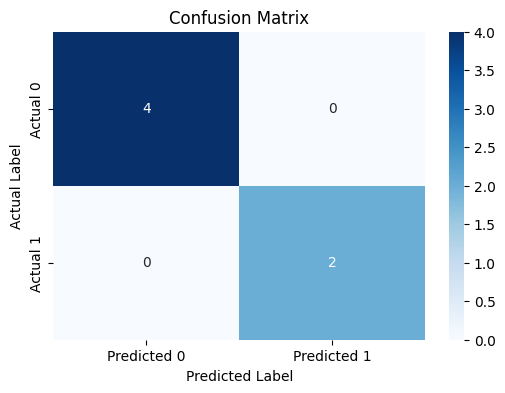

In [92]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Apply threshold for binary classification (for illustration purposes)
y_pred_binary = (y_pred > y_pred.mean()).astype(int)
y_test_binary = (y_test > y_test.mean()).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


## 8. ROC Curve and AUC (Demonstration)

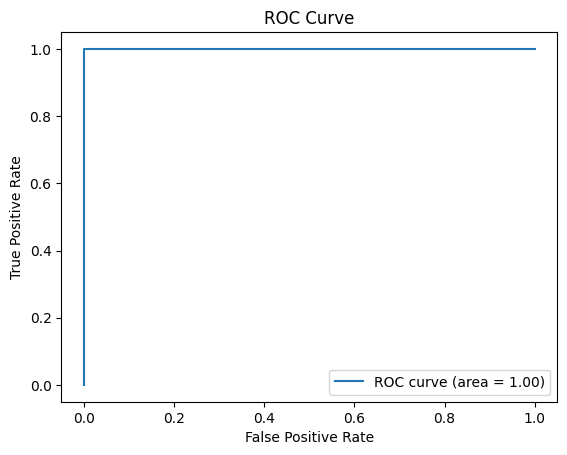

In [93]:
# Calculate ROC and AUC for binary outputs
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## 9. Summary of Results

In [94]:
print(f"Train-Test Split MSE: {mse}, MAE: {mae}, R²: {r2}")
print(f"Train-Val-Test Split MSE: {val_mse}, MAE: {val_mae}, R²: {val_r2}")
print(f"Cross-Validation MSE: {-np.mean(cv_mse)}, MAE: {-np.mean(cv_mae)}, R²: {np.mean(cv_r2)}")


Train-Test Split MSE: 49830096.855908334, MAE: 6286.453830757745, R²: 0.9024461774180498
Train-Val-Test Split MSE: 12192116.601371067, MAE: 2513.295176064142, R²: 0.9845840557494077
Cross-Validation MSE: 44168849.46887104, MAE: 5723.127060934896, R²: -0.053364276845097834


# Polynomial Linear Regression dataset 

## 1. Importing Libraries

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

## 2. Loading the Dataset

In [96]:
# Load the Salary Dataset
data = pd.read_csv(r'E:\Neuronetix Traning\Tasks\Task 3\Datasets\rank_salary.csv')  
data.head()  # Preview the data


,Position,Level,Salary
0,Teaching Assistants,1,45000
1,Guest Faculty,2,50000
2,Contractual Faculty,3,60000
3,Assistant Professor,4,80000
4,Associate Professor,5,110000


## 3. Data Preprocessing

In [97]:
# Define features (Level) and target variable (Salary)
X = data[['Level']]
y = data['Salary']

## 4. Train-Test Split

In [98]:
# Split data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the Test set
y_pred = model.predict(X_test)

# Calculate MSE, MAE, and R2 for Test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test Set MSE: {mse}, MAE: {mae}, R²: {r2}")


Test Set MSE: 7840057409.334131, MAE: 82607.75862068967, R²: 0.8451346684575974


## 5. Train-Val-Test Split

In [99]:
# Split the data into Train, Validation, and Test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Train the model on Train set
model.fit(X_train, y_train)

# Predict on Validation and Test sets
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calculate MSE, MAE, and R² for Validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Calculate MSE, MAE, and R² for Test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Validation Set MSE: {val_mse}, MAE: {val_mae}, R²: {val_r2}")
print(f"Test Set MSE: {test_mse}, MAE: {test_mae}, R²: {test_r2}")


Validation Set MSE: 67110739999.99998, MAE: 199299.99999999994, R²: -62.536795266272165
Test Set MSE: 37999984999.99999, MAE: 180650.0, R²: 0.24938301234567917


## 6. Cross-Validation

In [100]:
# Perform 5-Fold Cross Validation
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"Cross-Validation MSE: {-np.mean(cv_mse)}, MAE: {-np.mean(cv_mae)}, R²: {np.mean(cv_r2)}")



Cross-Validation MSE: 86661778604.29478, MAE: 233318.45238095243, R²: -3008.4028091967502


## 7. Confusion Matrix (Demonstration)


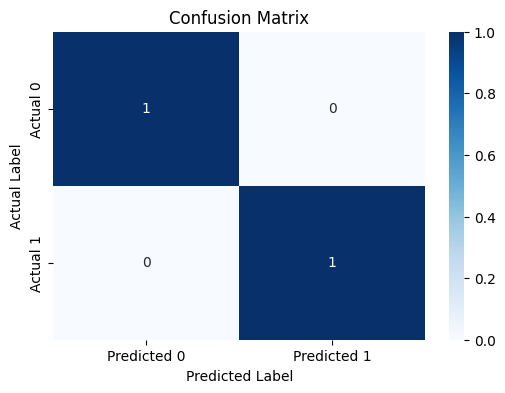

In [101]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Apply threshold for binary classification (for illustration purposes)
y_pred_binary = (y_pred > y_pred.mean()).astype(int)
y_test_binary = (y_test > y_test.mean()).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


## 8. ROC Curve and AUC (Demonstration)

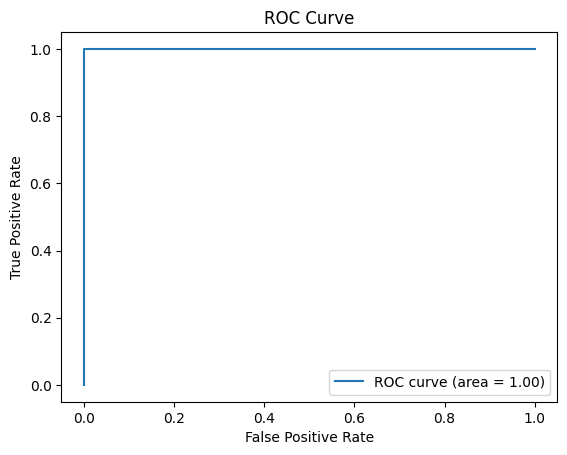

In [102]:
# Calculate ROC and AUC for binary outputs
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## 9. Summary of Results

In [103]:
print(f"Train-Test Split MSE: {mse}, MAE: {mae}, R²: {r2}")
print(f"Train-Val-Test Split MSE: {val_mse}, MAE: {val_mae}, R²: {val_r2}")
print(f"Cross-Validation MSE: {-np.mean(cv_mse)}, MAE: {-np.mean(cv_mae)}, R²: {np.mean(cv_r2)}")

Train-Test Split MSE: 7840057409.334131, MAE: 82607.75862068967, R²: 0.8451346684575974
Train-Val-Test Split MSE: 67110739999.99998, MAE: 199299.99999999994, R²: -62.536795266272165
Cross-Validation MSE: 86661778604.29478, MAE: 233318.45238095243, R²: -3008.4028091967502


# Multiple Linear Regression dataset

## 1. Importing Libraries

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

## 2. Loading the Dataset

In [105]:
# Load the Salary Dataset
data = pd.read_csv(r'E:\Neuronetix Traning\Tasks\Task 3\Datasets\multiple_linear_regression_dataset.csv')  
data.head()  # Preview the data


,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


## 3. Data Preprocessing

In [106]:
# Define features (independent variables) and target variable (dependent variable)
X = data[['age', 'experience']]  # Features
y = data['income']  # Target variable (dependent variable)


## 4. Train-Test Split

In [107]:
# Split data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the Test set
y_pred = model.predict(X_test)

# Calculate MSE, MAE, and R2 for Test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test Set MSE: {mse}, MAE: {mae}, R²: {r2}")


Test Set MSE: 753796.7693734544, MAE: 797.9113810821873, R²: 0.9387098237077887


## 5. Train-Val-Test Split

In [108]:
# Split the data into Train, Validation, and Test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Train the model on Train set
model.fit(X_train, y_train)

# Predict on Validation and Test sets
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calculate MSE, MAE, and R² for Validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Calculate MSE, MAE, and R² for Test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Validation Set MSE: {val_mse}, MAE: {val_mae}, R²: {val_r2}")
print(f"Test Set MSE: {test_mse}, MAE: {test_mae}, R²: {test_r2}")


Validation Set MSE: 2390672.9754583323, MAE: 1428.5836699911633, R²: 0.9726136495647532
Test Set MSE: 788467.3593407925, MAE: 863.2393321550298, R²: 0.9358908058271211


## 6. Cross-Validation

In [109]:
# Perform 5-Fold Cross Validation
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"Cross-Validation MSE: {-np.mean(cv_mse)}, MAE: {-np.mean(cv_mae)}, R²: {np.mean(cv_r2)}")


Cross-Validation MSE: 1944174.0363691833, MAE: 1122.6188216256794, R²: 0.9331289972266468


## 7. Confusion Matrix (Demonstration)


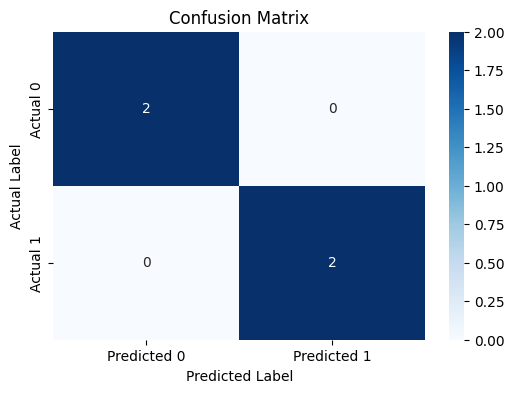

In [110]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Apply threshold for binary classification (for illustration purposes)
y_pred_binary = (y_pred > y_pred.mean()).astype(int)
y_test_binary = (y_test > y_test.mean()).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


## 8. ROC Curve and AUC (Demonstration)

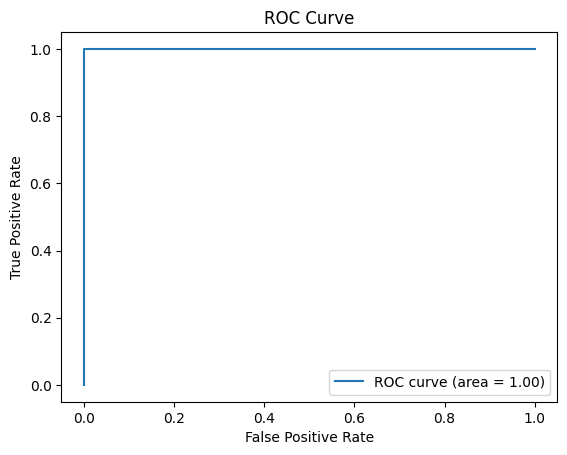

In [111]:
# Calculate ROC and AUC for binary outputs
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## 9. Summary of Results

In [112]:
print(f"Train-Test Split MSE: {mse}, MAE: {mae}, R²: {r2}")
print(f"Train-Val-Test Split MSE: {val_mse}, MAE: {val_mae}, R²: {val_r2}")
print(f"Cross-Validation MSE: {-np.mean(cv_mse)}, MAE: {-np.mean(cv_mae)}, R²: {np.mean(cv_r2)}")


Train-Test Split MSE: 753796.7693734544, MAE: 797.9113810821873, R²: 0.9387098237077887
Train-Val-Test Split MSE: 2390672.9754583323, MAE: 1428.5836699911633, R²: 0.9726136495647532
Cross-Validation MSE: 1944174.0363691833, MAE: 1122.6188216256794, R²: 0.9331289972266468
